# Music Recommendation System

## Data
The data file consists of following datasets:
 - kaggle_songs.txt  
 - kaggle_users.txt
 - kaggle_visible_evaluation_triplets.txt
 - taste_profile_song_to_tracks.txt
 - unique_tracks.txt

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [3]:
df = pd.read_csv('kaggle_visible_evaluation_triplets.txt', sep ='\t', names =['user_id', 'song_id', 'freq'])
df.head()       # First five rows of data

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
df.shape

(1450933, 3)

In [5]:
df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [6]:
df1 = pd.read_csv('unique_tracks.txt', sep='<SEP>', names= ['track_id', 'song_id', 'artist_name', 'song_name'])
df1.head()

,track_id,song_id,artist_name,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [7]:
df1.shape

(1000000, 4)

In [8]:
df2 = pd.read_csv('kaggle_songs.txt', sep = ' ', names=['song_id','hits'])
df2.head()

,song_id,hits
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2
2,SOAAADF12A8C13DF62,3
3,SOAAADZ12A8C1334FB,4
4,SOAAAFI12A6D4F9C66,5


In [9]:
df3 = pd.read_csv('taste_profile_song_to_tracks.txt',sep='\t', names=['song_id','track_id'])
df3.head()

,song_id,track_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17


## Checking Missing values and duplicates

In [10]:
print(sum(df.isnull().any()), sum(df1.isnull().any()))

0 1


In [11]:
duplicated = df.duplicated()
sum(duplicated)

0

In [12]:
duplicated = df1.duplicated()
sum(duplicated)

0

In [13]:
duplicates=df1["song_id"].duplicated()
sum(duplicates)

944

## Data Merging
Merge df=kaggle_visible_evaluation_triplets and df1= unique_tracks into single dataframe.

In [14]:
song_df = pd.merge(df, df1.drop_duplicates(['song_id']), on ='song_id', how= 'left') 
song_df.head()

,user_id,song_id,freq,track_id,artist_name,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [15]:
song_df.shape

(1450933, 6)

## Basic Statistics

In [16]:
print('Total number of unique users: ', song_df['user_id'].unique().shape[0])
print('Total number of unique songs: ', song_df['song_id'].unique().shape[0])
print('Total number of unique tracks: ', song_df['track_id'].unique().shape[0])

Total number of unique users:  110000
Total number of unique songs:  163206
Total number of unique tracks:  163206


From this basic statistics we can observe that:

- Total number of unique users are 110000.
- song_id and track_id are same. We can drop track_id.

In [17]:
print('Total number of unique song names: ', song_df['song_name'].unique().shape[0])
print('Total number of unique artists: ', song_df['artist_name'].unique().shape[0])

Total number of unique song names:  137623
Total number of unique artists:  28361


In [18]:
song_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


## Distribution of frequency

<AxesSubplot:xlabel='freq', ylabel='Density'>

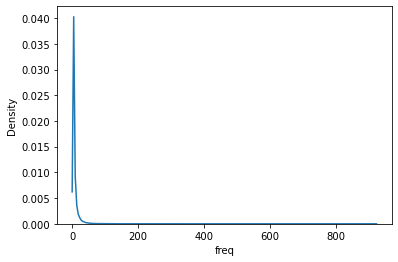

In [19]:
sns.distplot(song_df['freq'], hist = False, kde= True)

From this distribution of frequency of plot we can observe:
- frequency is in the range of 0 to 800. 
- Low frequency is having high number of count and high frequency is having low count. 

## Number of songs listened per user

In [20]:
songs_per_user = song_df.groupby(['user_id']).agg({'freq': 'count'}).reset_index()
songs_per_user.head()

,user_id,freq
0,00007a02388c208ea7176479f6ae06f8224355b3,9
1,00014a76ed063e1a749171a253bca9d9a0ff1782,11
2,00015189668691680bb1a2e58afde1541ec92ced,17
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,32


In [21]:
# Sort the number of songs listened per user in ascending order.
user_freq=songs_per_user.sort_values(['freq'], ascending= False)
user_freq

,user_id,freq
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
...,...,...
94588,dc14d67f7d79c2e54c5a220ceca3fea2baf8e0d3,5
94590,dc152fb9b0b72648dc10e6ed6effb3b148aa316a,5
94596,dc1b5222568cc291fe6bed8d6b37ce780ac661e5,5
44092,66bdee78bbcd7e82d359173ef801f5094b40a344,5


- There are users who listened to minimum of 5 unique songs.
- There are users who listened to maximum of 53 unique songs.

In [22]:
songs_per_user.describe()

,freq
count,110000.000000
mean,13.190300
std,8.070827
min,5.000000
25%,7.000000
50%,11.000000
75%,17.000000
max,53.000000


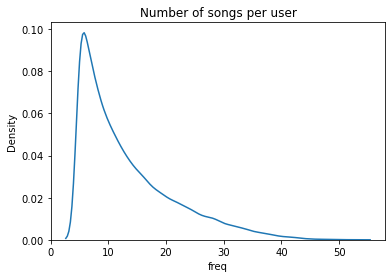

In [23]:
plt.title('Number of songs per user')
sns.distplot(songs_per_user['freq'], hist = False, kde= True)

plt.show()

From this graph we observe that:

- Users who listened to unique songs with less number of times(freq) is high.
- Users who listened to unique songs with high number of times(freq) is low.

## Analysis of popular Artist

In [24]:
artist_popularity = song_df.groupby(['artist_name']).agg({'freq': 'count'}).reset_index()
artist_popularity.head()

,artist_name,freq
0,!!!,109
1,!Deladap,3
2,& And Oceans,2
3,'68 Comeback,22
4,'N Sync/Phil Collins,48


In [25]:
# Sort the artist popularity in ascending order.
pop_artists = artist_popularity.sort_values(['freq'], ascending= False)
pop_artists

,artist_name,freq
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784
...,...,...
12458,John Rich (from Big & Rich),1
12465,John Stevens (Featuring Erika Christensen),1
23669,Teo Mammucari,1
12467,John Swihart,1


- There are artists like Ian Gillan Band, DuMonde feat Aydo Abay, etc are very less popular.
- There are artists like Coldplay, Kings of Leon, Justin Bieber etc are highly popular.

In [26]:
top_ten_artists = pop_artists[:10]
top_ten_artists

,artist_name,freq
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784
26441,Train,6617
23946,The Black Keys,6507
7969,Eminem,6297
18346,OneRepublic,6027
17317,Muse,5849


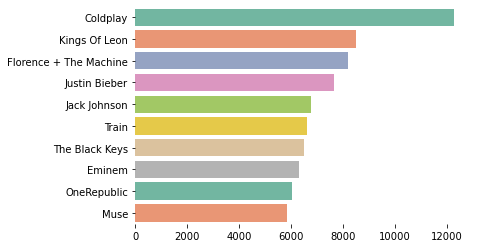

In [27]:
plt.figure()
labels = top_ten_artists['artist_name'].tolist()
counts = top_ten_artists['freq'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

In [28]:
artist_popularity.describe()

,freq
count,28361.000000
mean,51.159444
std,249.392211
min,1.000000
25%,2.000000
50%,6.000000
75%,25.000000
max,12279.000000


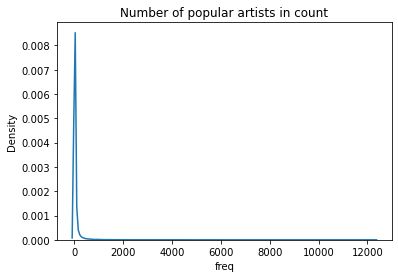

In [29]:
plt.title('Number of popular artists in count')
sns.distplot(artist_popularity['freq'], hist = False, kde= True)

plt.show()

- Number of popular Artists are only few in count.
- Most of the artists are not much popular in count.

## Analysis of popularity of songs

In [30]:
song_popularity = song_df.groupby(['song_name']).agg({'freq': 'count'}).reset_index()
song_popularity.head()

,song_name,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [31]:
# Sort Song popularity in ascending order.
song_freq=song_popularity.sort_values(['freq'], ascending= False)
song_freq

,song_name,freq
98812,Sehr kosmisch,5043
125393,Undo,4483
136066,You're The One,4270
28716,Dog Days Are Over (Radio Edit),3780
93984,Revelry,3672
...,...,...
67457,Lobe Limbique,1
67456,Lobbyn om 5,1
67453,Loan Me A Dime,1
67449,Load off my mind,1


- The first five rows of songs are very less popular.
- The last rows of songs are highly popular.
- Songs like Sehr kosmisch, Undo, You're the one are some of the highly popular songs.

In [32]:
top_ten_songs = song_freq[:10]
top_ten_songs

,song_name,freq
98812,Sehr kosmisch,5043
125393,Undo,4483
136066,You're The One,4270
28716,Dog Days Are Over (Radio Edit),3780
93984,Revelry,3672
98585,Secrets,3456
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
47683,Hey_ Soul Sister,2791
37656,Fireflies,2745
121358,Tive Sim,2669


In [33]:
labels = top_ten_songs['song_name'].tolist()
counts = top_ten_songs['freq'].tolist()

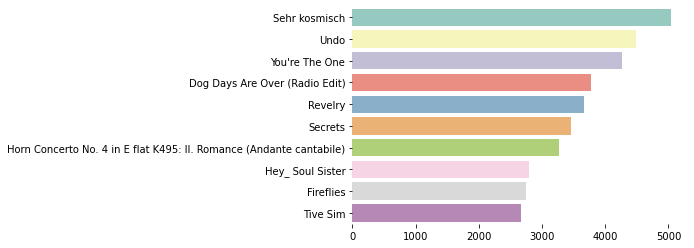

In [34]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [35]:
song_popularity.describe()

,freq
count,137622.000000
mean,10.542878
std,52.414683
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,5043.000000


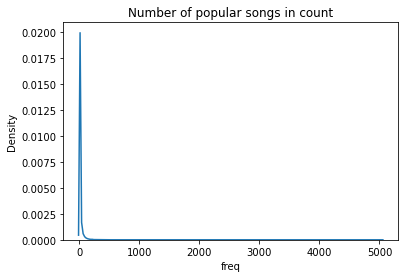

In [36]:
plt.title('Number of popular songs in count')
sns.distplot(song_popularity['freq'], hist = False, kde= True)

plt.show()

- Songs which are highly popular are less in count.
- Songs which are not much popular are high in count.

In [37]:
# Random sampling of data
sample = np.random.permutation(20000)

In [38]:
sample

array([18069,  1322, 13089, ...,  7748,  9795,  4341])

In [39]:
sample_df = song_df.take(sample)

In [40]:
sample_df

,user_id,song_id,freq,track_id,artist_name,song_name
18069,d0e8cb176a1e93fa9246392ce6a53f09f02b37dd,SOLLHNB12A8C1431C2,1,TRXVBPY128F930FAE9,Re-up Gang,Heaven
1322,f75212237dbf209cef2ecc88954ef9272c2bb4a4,SOXPYJU12A8C13CD4B,2,TRASMOY128F4293ED6,Kosheen,Slip & Slide (Suicide)
13089,9a4aa574b482c4f15ffc675a0e9a8124b1de92e5,SONQCXC12A6D4F6A37,7,TRJWVCU128F14581FF,Sheena Easton,Strut (1993 Digital Remaster)
13706,912e24fa97302cde8a3bbe98328d1ed30922fc09,SOXCUHM12B0B8092BB,1,TREUQIH128F424FEFD,Holy Fuck,Safari
9103,815f6c44ea6db9722db94e9ffae4392ec6e5873c,SOSUPKZ12AB017F6A3,1,TRJDTLQ12903CF7B43,Caifanes,Metamorfeame
...,...,...,...,...,...,...
19901,4211d3c0d97c6f0f58fd665837214cc6ea55a4c7,SOKBZMB12AC3DF6A94,2,TRYEIDS12903CA2821,Josh Turner,All Over Me
5798,6f5f086d87028971d43593298093e4b46c1db7eb,SOUOCRG12A67AE0E17,2,TRIDJFI12903CC2F56,4 Non Blondes,What's Up?
7748,5fd5743e68ee81b67c4b4d83c2f5a2606092cd64,SOMXEWC12A6D4F8080,1,TREIMSK128F145BF36,The Grapes Of Wrath,All The Things I Wasn't
9795,c36b1e2dd32738fa4f4b7c0074d92161c9178cea,SOSMJUR12AB0188012,3,TRVUWZQ12903CAA9BE,Green Day,St. Jimmy [feat. Green Day & The Cast Of Ameri...


In [41]:
sample_df1 = sample_df.drop(['track_id', 'song_id', 'artist_name'], axis=1)
sample_df1.tail()

,user_id,freq,song_name
19901,4211d3c0d97c6f0f58fd665837214cc6ea55a4c7,2,All Over Me
5798,6f5f086d87028971d43593298093e4b46c1db7eb,2,What's Up?
7748,5fd5743e68ee81b67c4b4d83c2f5a2606092cd64,1,All The Things I Wasn't
9795,c36b1e2dd32738fa4f4b7c0074d92161c9178cea,3,St. Jimmy [feat. Green Day & The Cast Of Ameri...
4341,a4b065ead61b2d98cbec7e738a9d76b390a6220a,1,Sway (Album Version)


# Popularity Recommender Engine:

In [42]:
import Rec as rec

In [43]:
pop = rec.popularity_recommender_py()

In [44]:
pop.create(sample_df1,"user_id","song_name")

In [45]:
pop.recommend(sample_df1["user_id"][5])

,user_id,song_name,score,Rank
12475,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,You're The One,74,1.0
8993,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Sehr kosmisch,72,2.0
11470,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo,68,3.0
8524,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry,62,4.0
2627,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Dog Days Are Over (Radio Edit),47,5.0
3447,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Fireflies,45,6.0
4578,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Horn Concerto No. 4 in E flat K495: II. Romanc...,43,7.0
8966,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Secrets,41,8.0
2818,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Drop The World,32,9.0
11124,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Tive Sim,32,10.0


In [46]:
pop.recommend(sample_df1["user_id"][50])

,user_id,song_name,score,Rank
12475,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,You're The One,74,1.0
8993,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Sehr kosmisch,72,2.0
11470,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Undo,68,3.0
8524,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Revelry,62,4.0
2627,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Dog Days Are Over (Radio Edit),47,5.0
3447,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Fireflies,45,6.0
4578,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Horn Concerto No. 4 in E flat K495: II. Romanc...,43,7.0
8966,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Secrets,41,8.0
2818,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Drop The World,32,9.0
11124,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Tive Sim,32,10.0


# Collaborative Recommender System:
## user based recommender

In [47]:
isr=rec.item_similarity_recommender_py()
isr.create(sample_df1,"user_id","song_name")

In [48]:
user_items=isr.get_user_items(sample_df1["user_id"][5])

In [49]:
for user_items in user_items:
    print(user_items)

Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
You're The One
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)
Tive Sim
El Cuatrero
Unite (2009 Digital Remaster)


In [50]:
isr.recommend(sample_df1["user_id"][5])

No. of unique songs for the user: 6
no. of unique songs in the training set: 12597
Non zero values in cooccurence_matrix :2338


,user_id,song,score,rank
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Virtual Diva,0.083333,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,That's The Way Love Goes,0.083333,2
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Rattlechaser,0.083333,3
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,No Techno In This Room Please,0.083333,4
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Suruton nuoruusaika,0.083333,5
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Superhéroe,0.083333,6
6,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,El Profe,0.083333,7
7,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Hoy Que Ya No Estas Aqui,0.083333,8
8,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Yo Sé Lo Que Tú Das,0.083333,9
9,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Heaven's Missing An Angel,0.083333,10


In [51]:
isr.recommend(sample_df1["user_id"][50])

No. of unique songs for the user: 14
no. of unique songs in the training set: 12597
Non zero values in cooccurence_matrix :296


,user_id,song,score,rank
0,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Keep The Change_ You Filthy Animal,0.059524,1
1,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Break Out! Break Out!,0.059524,2
2,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,The Girl's a Straight-Up Hustler,0.059524,3
3,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Too Much,0.041667,4
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Always You (Good Times),0.035714,5
5,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Dangerous MC's (Featuring Mark Curry_ Snoop Do...,0.035714,6
6,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Welcome To The Family,0.035714,7
7,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Un-thinkable (I'm Ready),0.035714,8
8,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Everything Evil,0.035714,9
9,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,Cockney Thug,0.035714,10


## Item based recommender

In [52]:
isr.get_similar_items(["Revelry"])

no. of unique songs in the training set: 12597
Non zero values in cooccurence_matrix :621


,user_id,song,score,rank
0,,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.117021,1
1,,You're The One,0.114754,2
2,,Undo,0.092437,3
3,,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.076923,4
4,,Ain't Misbehavin,0.071429,5
5,,Hey_ Soul Sister,0.069767,6
6,,Tive Sim,0.068182,7
7,,Greece 2000,0.060606,8
8,,Fuck Kitty,0.060606,9
9,,Pursuit Of Happiness (nightmare),0.058824,10


In [53]:
isr.get_similar_items(["Desire"])

no. of unique songs in the training set: 12597
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,St. Jimmy [feat. Green Day & The Cast Of Ameri...,0.0,1
1,,All The Things I Wasn't,0.0,2
2,,Devore Amante,0.0,3
3,,The Fun Lovin' Criminal,0.0,4
4,,Heart & Soul (LP Version),0.0,5
5,,Jet Ski,0.0,6
6,,Hephaestus - The Hammer Of The Gods,0.0,7
7,,Don't Hurry for Heaven,0.0,8
8,,Skyscraper,0.0,9
9,,I Can't Make This Movie,0.0,10


# Content Based RS

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
songs = song_df.sample(n=10000).reset_index(drop=True)
songs.head()

,user_id,song_id,freq,track_id,artist_name,song_name
0,c4ecdb8986944f6c8255e2d2fa16e0dbd8be733d,SONUEHX12AB017DB2C,1,TRRGTXK128F92F991B,Florence + The Machine,Dog Days Are Over (Demo)
1,eb41b6ab342540bd00bba5863d836a7a6a0bd51f,SORJICW12A8C13640D,1,TRVAWVL128F93508F9,Pavement,Mercy:The Laundromat
2,1f71944adb0753dbd926b7ffbddf31dcea30f80c,SONJXPP12A8AE48D26,2,TRPLYAH128F426B9CD,Paulina Rubio,Un Dia Gris
3,fee44ee0931e29c3b420cd4b4088450fb8d8cc53,SOMBQAV12A8C137AA3,1,TRDNMQD128F9325C24,Explosions In The Sky,The Only Moment We Were Alone
4,e839117d23f4c78b9370dfc3929a5a7680d16ce7,SOULTKQ12AB018A183,3,TRMFRFX12903CD6E4C,B.o.B,Nothin' On You [feat. Bruno Mars] (Album Version)


In [56]:
songs['song_name'] = songs['song_name'].str.replace(r'\n', '')

In [57]:
cv = CountVectorizer()
asm = cv.fit_transform(songs['song_name'])

In [58]:
cosine_similarities = cosine_similarity(asm)

In [59]:
similarities = {}

for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs. 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    similarities[songs['song_name'].iloc[i]] = [(cosine_similarities[i][x], songs['song_name'][x], songs['artist_name'][x]) for x in similar_indices][1:]

In [60]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [61]:
recommedations = ContentBasedRecommender(similarities)

In [62]:
recommendation = {
    "song": songs['song_name'].iloc[10],
    "number_songs": 4 
}

In [63]:
recommedations.recommend(recommendation)

The 4 recommended songs for Light Rail Coyote are:
Number 1:
Light by Talvin Singh with 0.577 similarity score
--------------------
Number 2:
Marvelous Light by Christy Nockels with 0.408 similarity score
--------------------
Number 3:
Light Pattern by Bonobo with 0.408 similarity score
--------------------
Number 4:
Flash Light by Parliament with 0.408 similarity score
--------------------


# SVD

In [64]:
# Random sampling of data
sample = np.random.permutation(20000)

In [65]:
sample

array([12146, 15941,  4785, ...,  8149,  8606,  9326])

In [66]:
sample_df = song_df.take(sample)

In [67]:
sample_df.drop('track_id', axis=1)

,user_id,song_id,freq,artist_name,song_name
12146,e38f92b47e681e588063b06f7d0d4f26f81ca3e0,SOCKASA12A67ADF6DD,1,The Darkness,Makin' Out
15941,b50d6ee5b4e10aa8a8d1124d499b66f9464ce55f,SOCVBFV12A6701FB94,1,No Doubt,Don't Speak
4785,d58fe04a5336173938a7123df91f4395a482d011,SOTBJNF12A6D4F87D3,1,Hevia,Naves
2387,49b791ffdcfdc2b226b1db492c32a38ac7334d9a,SOIAFUH12A6D4F8E01,5,Remy Ma / Ne-Yo,Feels So Good
15827,bc1aa4972ee6e7c164ad5a3cc485678987a31e08,SOCKFLZ12A81C222D4,1,Extremoduro,So Payaso (Version 2004)
...,...,...,...,...,...
14120,c7aaa355cdb507da494ba8723e84bb66207c5bdc,SOPKQMX12A8C13D068,1,Bright Eyes,Take It Easy (love Nothing) (Album Version)
4657,1438a1489990ddebbc81e191287a02243174fa3a,SOHMLNH12AF72A4B7B,1,Black Dice,Smiling Off (Luomo Remix)
8149,f37853d3600c715e6003edbf35ea3dd31a17ed2a,SOORETR12AF72AA294,1,The Magic Numbers,Try
8606,d4f3a37f6ff328d4774a89c0e87d226b21a7d801,SORUFVF12AB018230B,1,John Mayer,Neon


In [68]:
from scipy.sparse import csr_matrix
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [69]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]

In [70]:
sample_df['freq'] = pd.cut(sample_df['freq'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [71]:
freq = pd.DataFrame(sample_df.groupby('freq').size(), columns=['count']).reset_index(drop=False)

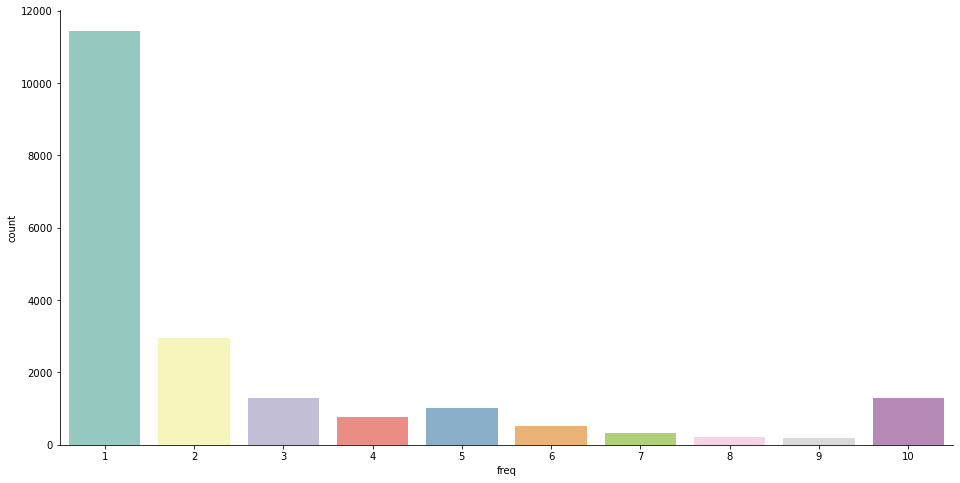

In [72]:
plt.figure(figsize=(16, 8))
sns.barplot(x='freq', y='count', palette='Set3', data=freq)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [73]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(sample_df[['user_id', 'song_id', 'freq']], reader)

In [74]:
trainset, testset = train_test_split(data, test_size=.2)

In [75]:
param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [76]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [77]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  12 | elapsed:   11.7s remaining:   35.3s
[Parallel(n_jobs=-2)]: Done   7 out of  12 | elapsed:   11.9s remaining:    8.4s


2.371763018376391
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.08}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed:   20.7s finished


In [78]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3432  2.3663  2.4243  2.2979  2.3814  2.3626  0.0418  
Fit time          7.25    8.70    6.94    7.06    6.96    7.38    0.67    
Test time         0.02    0.02    0.02    0.02    0.03    0.02    0.00    


{'test_rmse': array([2.34322065, 2.36625845, 2.42429503, 2.29791016, 2.38141226]),
 'fit_time': (7.246623516082764,
  8.695722103118896,
  6.937486886978149,
  7.058131456375122,
  6.9603917598724365),
 'test_time': (0.020978212356567383,
  0.02393484115600586,
  0.02194046974182129,
  0.022938013076782227,
  0.025929927825927734)}

In [79]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.3617
The RMSE is 2.3617018788521573
